# Visualização de dados 

## Na aula 3, utilizamos a API do Bacen para importar a série de IPCA mensal conforme codigo abaixo:

In [1]:
import requests

url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json'
response = requests.get(url).json()


In [2]:
#transformando em um dataframe

import pandas as pd

df = pd.DataFrame(response)

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

df['valor'] = df['valor'].astype(float)

df.head()

,data,valor
0,1980-01-01,6.62
1,1980-02-01,4.62
2,1980-03-01,6.04
3,1980-04-01,5.29
4,1980-05-01,5.70


# 1- Utilize a função plot do matplotlib para desenhar um gráfico de linha da série de IPCA

In [3]:
# Importando função plot do matplotlib para desenhar um gráfico de linha
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook - configura o ambiente para exibir os gráficos gerados pelo matplotlib diretamente na saída da célula, em vez de abrir janelas de plotagem separadas.
%matplotlib inline

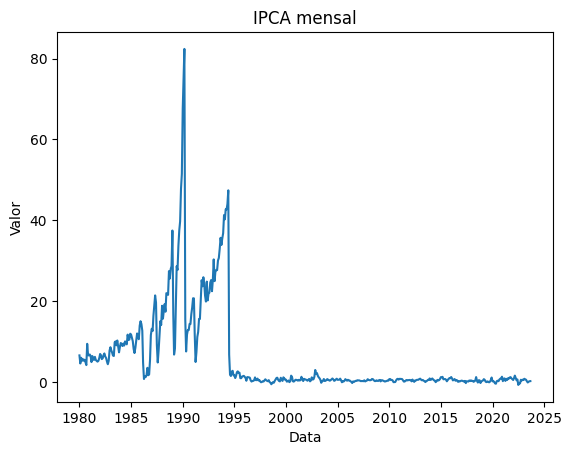

In [4]:
plt.plot(df.data, df.valor)
plt.title('IPCA mensal')
plt.xlabel('Data')
plt.ylabel('Valor');

Ao analisar o gráfico, fica claro que a inflação no Brasil foi relativamente estabilizada após a implementação do Plano Real (de 1994)

## 2- Faça um novo gráfico para o período pós plano real (a partir de 1995)
Coloque título e legenda no gráfico

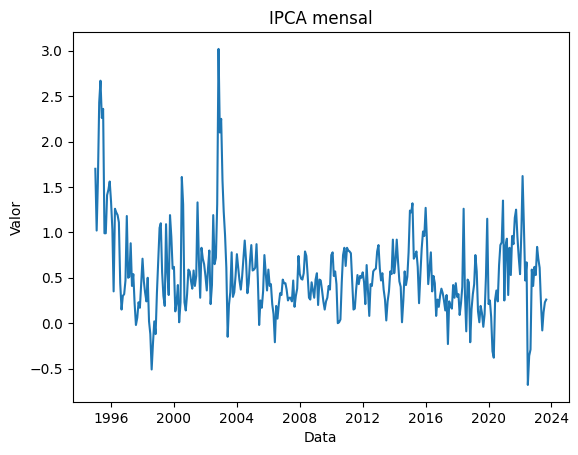

In [5]:
# Filtrando os dados para o período a partir de 01/01/1995
df1 = df[df['data'] >= '1995-01-01']

plt.plot(df1.data, df1.valor)
plt.title('IPCA mensal')
plt.xlabel('Data')
plt.ylabel('Valor');

## 3- Crie 2 espaços para visualizações gráficas. Plote em um, o IPCA até 01/12/1994 e, no outro, o ipca de 01/01/1995 em diante.

In [6]:
df2 = df[df['data'] < '1995-01-01']


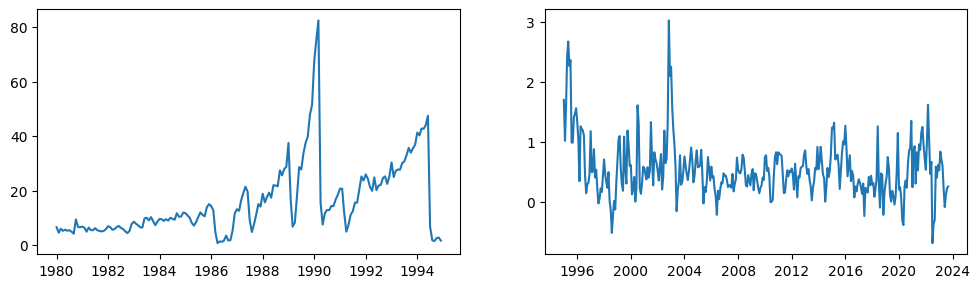

In [7]:

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(df1.data, df1.valor)
ax1.plot(df2.data, df2.valor)

## Usaremos novamente nossa base de dados de países para tentar entender melhor a relação entre suas variáveis.

In [8]:
import pandas as pd
url= ('https://github.com/thaissalzer/thaissalzer/blob/246a0321f38f3faacd4159820288e2dbdeddf90a/aula9.xlsx?raw=true')
df= pd.read_excel(url)
df.head()


,Time,Country Name,GDP_PC,FBKF,populacao,forca_trab_educ,arable_land,industria_PERCPIB,gasto_educ_PERCPIB,QuintilRank
0,2020,Argentina,8496.424142,5.403807e+10,4.537676e+07,77.239998,0.719151,22.180573,5.01605,medio ricos
1,2020,Australia,51720.370763,3.003566e+11,2.565529e+07,76.830002,1.194452,25.406283,6.10000,ricos
2,2020,Brazil,6794.489159,2.405663e+11,2.131963e+08,79.400002,0.261552,17.701653,NaN,medio
3,2020,China,10408.669756,6.240217e+12,1.411100e+09,NaN,0.084667,37.842826,3.57000,medio ricos
4,2020,France,39055.282928,6.051972e+11,6.757111e+07,75.650002,0.265743,16.495439,5.50000,ricos


Um gráfico de dispersão é útil para visualizar a relação entre duas variáveis, mostrando como os pontos estão distribuídos.

##  4- Crie gráficos de dispersão para tentar entender a relação da variável 'gasto_educ_PERCPIB'e PIB per capta.

In [10]:
import seaborn as sns

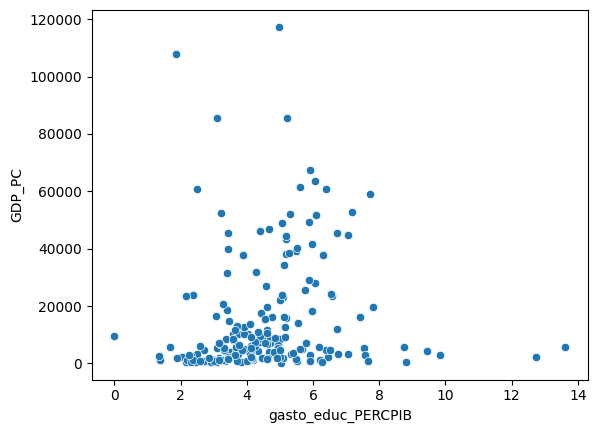

In [11]:
sns.scatterplot(x='gasto_educ_PERCPIB', y='GDP_PC', data=df);


## 5- Você consegue observar algum padrão? Fala um regplot para confirmar. 

Analise a correlação entre as variáveis

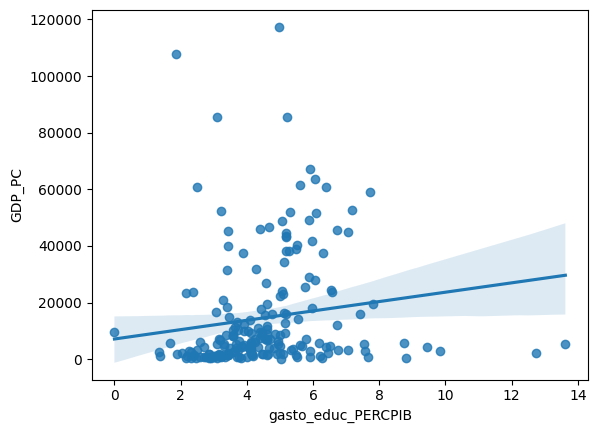

In [12]:
#existe um padrão?
sns.regplot(x='gasto_educ_PERCPIB', y='GDP_PC', data=df);


## 6- Dividindo os países entre pobres e ricos (acima/ abaixo da mediana do GDP_PC), identifique se o padrão é o mesmo para ambos os grupos usando o regplot para cada grupo separadamente, porém no mesmo gráfico

In [13]:
# encontrando a mediana
mediana_gdp_pc = df['GDP_PC'].median()
mediana_gdp_pc

6034.203334986503

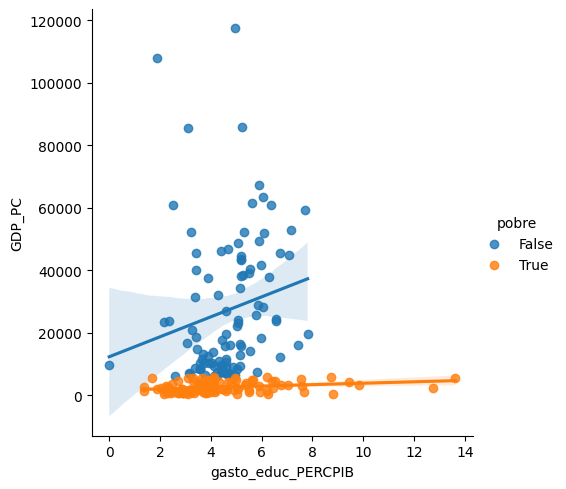

In [14]:
df['pobre'] = df['GDP_PC'] < mediana_gdp_pc

sns.lmplot(data=df,
           x='gasto_educ_PERCPIB', y='GDP_PC', hue='pobre')
